Madusanka Madiligama 01/06/2024

In [1]:
# library imports
import os
import gc
import datetime

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import kpss
%matplotlib inline

In [2]:
#Configure plot aesthetics for matplotlib and seaborn.
def set_plot_aesthetics():

    plt.rcParams['figure.figsize'] = (10, 8)  
    plt.rcParams['xtick.labelsize'] = 13      
    plt.rcParams['ytick.labelsize'] = 13      
    plt.rcParams['axes.labelsize'] = 14       
    sns.set_palette('tab10')                  

# Apply the plot settings
set_plot_aesthetics()
colors = list(sns.color_palette('tab10')) 

In [3]:
#convert date into datetime
def convert_to_date(x):
    return datetime.datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', 
                 parse_dates=['Quarter'], date_parser=convert_to_date)
df.head()

C:\Users\nikmb\AppData\Local\Temp\ipykernel_37548\995262021.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv',


,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [6]:
#Calculate the number and percentage of missing values in each column of a DataFrame.

def missing_values(df):

    # Calculate the number of missing values per column
    missing_count = df.isnull().sum()

    # Calculate the percentage of missing values
    missing_percent = np.round((100 * missing_count) / len(df), 2)

    # Create a DataFrame to display the results
    missing_data = pd.DataFrame({
        '# Missing': missing_count, 
        '% Missing': missing_percent
    })

    return missing_data


#Prints basic information about the DataFrame, including its size, features, missing values, and unique values count.
def print_data_info(df):

    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    print("\nFeatures:")
    print("-" * 10)
    print(df.columns.tolist())
    
    print("\nMissing Values:")
    print("-" * 15)
    print(missing_values(df))
    
    print("\nUnique Values Count:")
    print("-" * 15)
    print(df.nunique())


In [7]:
# printing basic info about the data
print_data_info(df)

Rows: 61
Columns: 3

Features:
----------
['Quarter', 'Revenue', 'Net Income']

Missing Values:
---------------
            # Missing  % Missing
Quarter             0        0.0
Revenue             0        0.0
Net Income          0        0.0

Unique Values Count:
---------------
Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [8]:
df.set_index('Quarter', inplace=True)

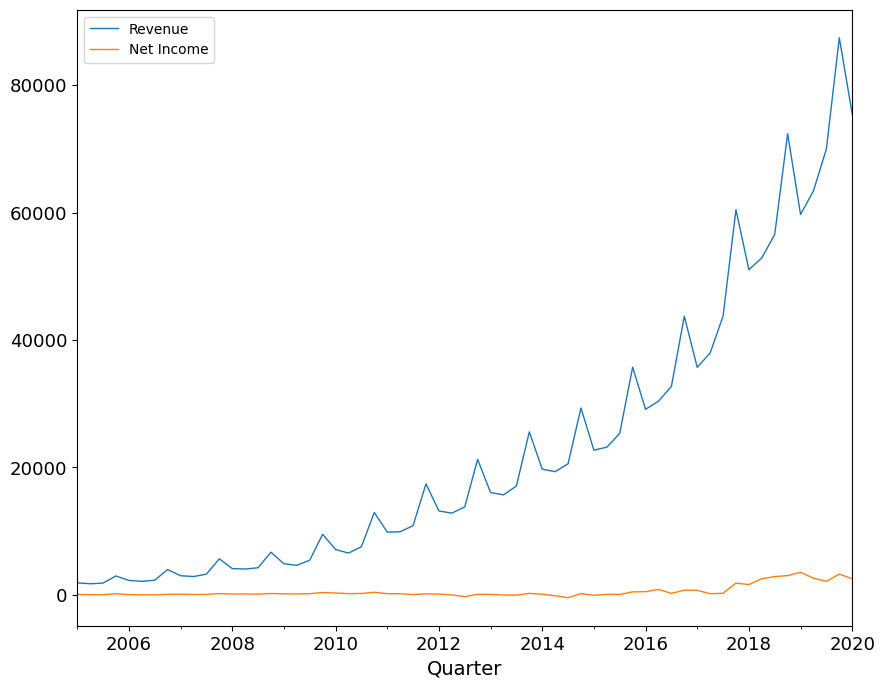

In [10]:
#Plot Revenue and Net Income
df.plot(lw=1)
plt.show()

In [11]:
#Plot Revenue and Net Income in intractive figure
fig = go.Figure()

# Create a trace for the revenue data
trace = go.Scatter(
    x=df.index, 
    y=df.Revenue, 
    name='Amazon Revenue', 
    text=[f"Year: {x.year}<br>Revenue: {y}" for x, y in zip(df.index, df.Revenue)],
    mode='lines+markers',
    marker=dict(color='rgb(102,194,165)')
)

fig.add_trace(trace)

# Define the layout with improved settings
layout = dict(
    title=dict(
        text='Amazon Revenue Over the Years',
        x=0.5,  
        font=dict(size=18)  
    ),
    xaxis=dict(
        title='Year',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1Y', step='year', stepmode='backward'),
                dict(count=3, label='3Y', step='year', stepmode='backward'),
                dict(count=5, label='5Y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(
        title='Revenue (in millions)'
    ),
    legend=dict(
        x=0.05, y=1,  # Position the legend
        bgcolor='rgba(255, 255, 255, 0.5)'  
    )
)

fig.update_layout(layout)
fig.show()


We observe that the time series appears to be stationary until around the year 2010. However, post-2010, the trend becomes non-linear, suggesting non-stationarity. To examine this more rigorously, we will employ hypothesis testing:

- Null Hypothesis ($H_0$): The data is stationary.
- Alternative Hypothesis ($H_1$): The data is non-stationary.

The results of this hypothesis test will help us confirm whether the time series' behavior changes significantly after 2010.


In [13]:
tstest = kpss(df['Revenue'], regression='c')

C:\Users\nikmb\AppData\Local\Temp\ipykernel_37548\2155023455.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [14]:

tstest

(1.1700203698692262,
 0.01,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The output of the KPSS test shows four values: the test statistic, the p-value, the number of lags used, and critical values for various significance levels. In this case:

The test statistic is 1.1700203698692262.
The p-value is 0.01.
Given that the p-value is 0.01, it is smaller than the typical threshold of 0.05 (5%) used to reject the null hypothesis. In the context of the KPSS test, where the null hypothesis states that the data is stationary, a p-value of 0.01 strongly suggests rejecting the null hypothesis in favor of the alternative hypothesis. This indicates that the data is non-stationary and likely contains a trend or a unit root, as you expected.

Therefore, the data should be considered non-stationary based on this test result, and further analysis or data transformation might be necessary, depending on your application or modeling approach.

When decomposing a time series, the choice between an additive or multiplicative model is crucial. Additive models are typically used for time series that are stationary, where fluctuations around the trend do not vary with the level of the time series. On the other hand, multiplicative models are more appropriate for non-stationary data, especially when the seasonal variation increases proportionally with the level of the time series. Each model can be defined as follows:
- Additive:  $ y_t = T_t + C_t + S_t + I_t $
- Multiplicative: $ y_t = T_t \times C_t \times S_t \times I_t $

where 
$T_t$ = Trend, 
$C_t$ = Cyclic, 
$S_t$ = Seasonality, and 
$I_t$ = residual.


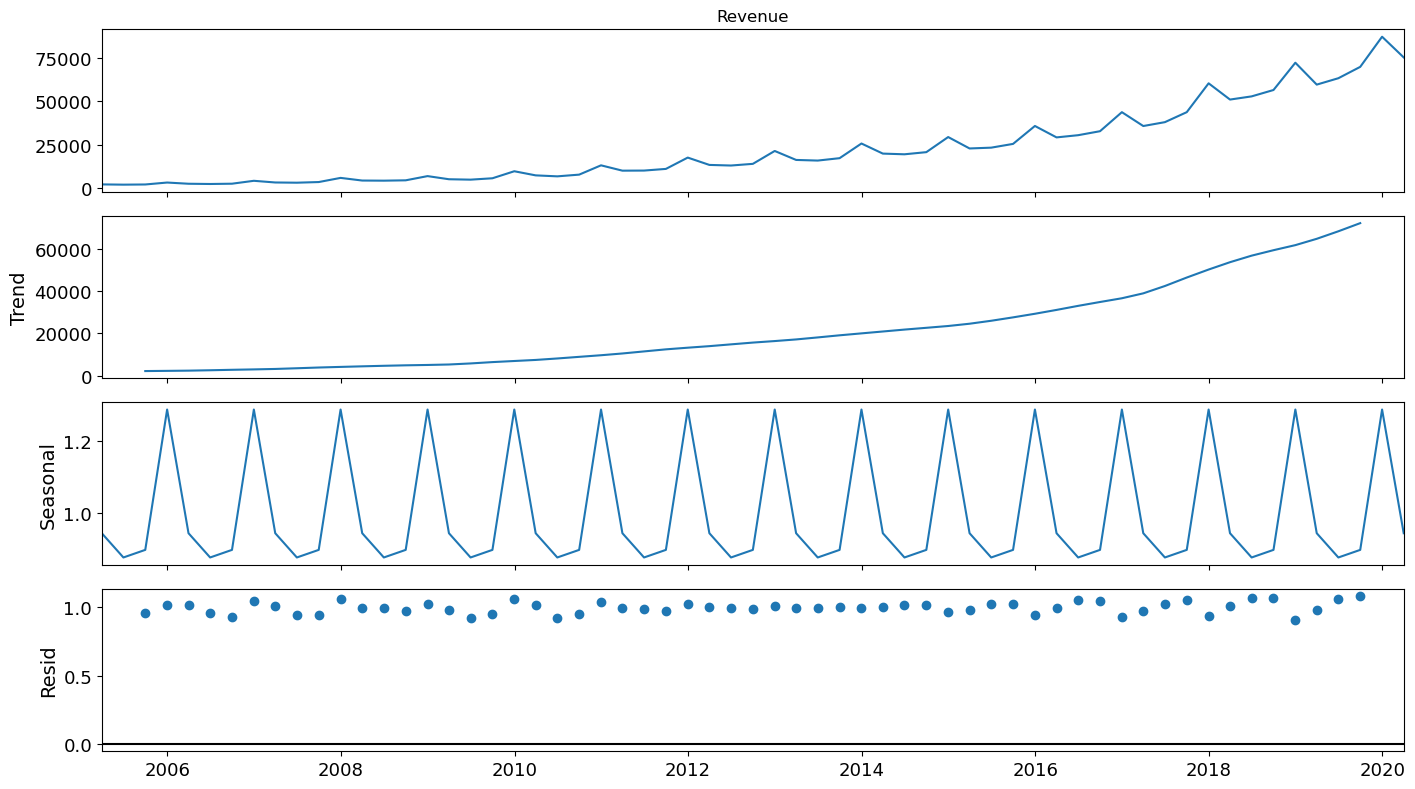

In [17]:
# decomposition

# Ensure your DataFrame is sorted by date in ascending order
df_sorted = df.sort_values('Quarter')

# Perform the seasonal decomposition on the sorted DataFrame
res = sm.tsa.seasonal_decompose(df_sorted.Revenue, model='multiplicative', period=4)  # Assuming quarterly data

# Plot the decomposed components of the time series
resplot = res.plot()
resplot.set_figheight(8)
resplot.set_figwidth(15)
plt.show()


In [19]:
print(f"Observed:\n{'-'*10}\n{res.observed}")
print(f"Trend:\n{'-'*6}\n{res.trend}")
print(f"Seasonal:\n{'-'*10}\n{res.seasonal}")
print(f"Residual:\n{'-'*10}\n{res.resid}")

Observed:
----------
Quarter
2005-03-31     1902.0
2005-06-30     1753.0
2005-09-30     1858.0
2005-12-31     2977.0
2006-03-31     2279.0
               ...   
2019-03-31    59700.0
2019-06-30    63404.0
2019-09-30    69981.0
2019-12-31    87437.0
2020-03-31    75452.0
Name: Revenue, Length: 61, dtype: float64
Trend:
------
Quarter
2005-03-31          NaN
2005-06-30          NaN
2005-09-30     2169.625
2005-12-31     2265.000
2006-03-31     2369.375
                ...    
2019-03-31    64691.375
2019-06-30    68248.750
2019-09-30    72099.500
2019-12-31          NaN
2020-03-31          NaN
Name: trend, Length: 61, dtype: float64
Seasonal:
----------
Quarter
2005-03-31    0.941840
2005-06-30    0.873649
2005-09-30    0.894993
2005-12-31    1.289518
2006-03-31    0.941840
                ...   
2019-03-31    0.941840
2019-06-30    0.873649
2019-09-30    0.894993
2019-12-31    1.289518
2020-03-31    0.941840
Name: seasonal, Length: 61, dtype: float64
Residual:
----------
Quarter
2005-03

In a multiplicative model, the observed time series values are understood to be the product of the trend, seasonal, and residual components. Each observed value can be represented as the multiplication of these three underlying factors.

In [20]:
print(res.observed[2])
print(res.trend[2]*res.seasonal[2]*res.resid[2])

1858.0
1857.9999999999998


C:\Users\nikmb\AppData\Local\Temp\ipykernel_37548\657235117.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nikmb\AppData\Local\Temp\ipykernel_37548\657235117.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



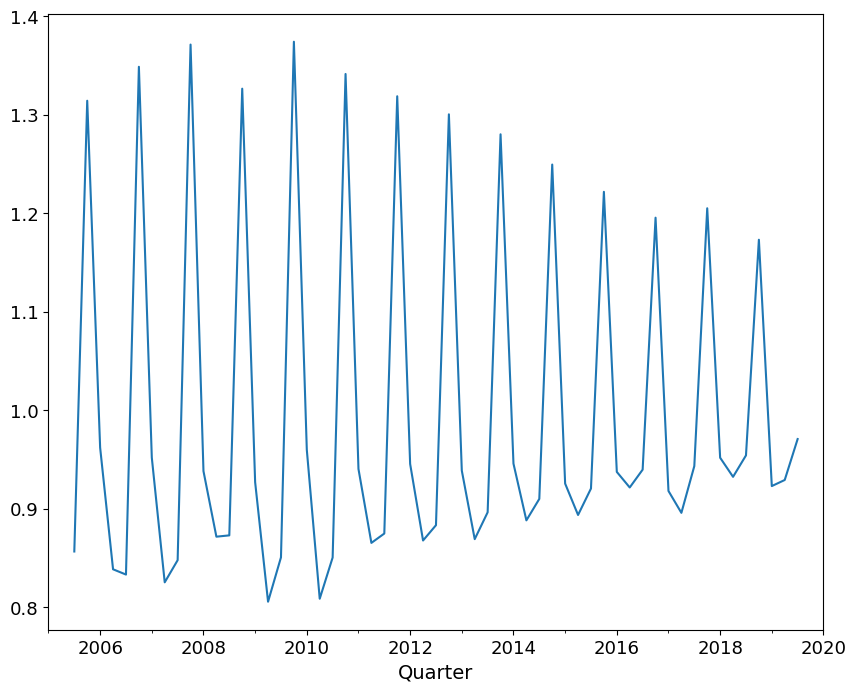

In [21]:
(res.observed/res.trend).plot();


Upon dividing the observed data by the trend component, we observe the absence of any underlying trend. The resulting values retain the seasonal pattern inherent in the data, suggesting that the detrended series may be stationary. To confirm this, we will subject the detrended series to hypothesis testing.

- $H_0$: The data is stationary.
- $H_a$: The data is non-stationary.

In [22]:
no_trend_ts = pd.Series(res.observed / res.trend)
no_trend_ts = no_trend_ts.dropna()

In [ ]:
ntts_test = kpss(no_trend_ts, regression='c')
ntts_test
     

The results of the KPSS test on the detrended time series yield a test statistic of 0.10907270284783672 and a p-value of 0.1. When compared against a significance level of 5%, the p-value is greater than the critical value of 0.463. This indicates that we lack sufficient evidence to reject the null hypothesis, which posits that the series is stationary. Consequently, we can assert with some confidence that the detrended data exhibits stationarity.